In [471]:
import pandas as pd
import numpy as np

In [472]:
df = pd.read_csv(r"C:\Users\gg787\mtcars\diabetes.csv")

In [473]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [474]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [476]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [477]:
import seaborn as sns

len(df.columns)

9

In [478]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


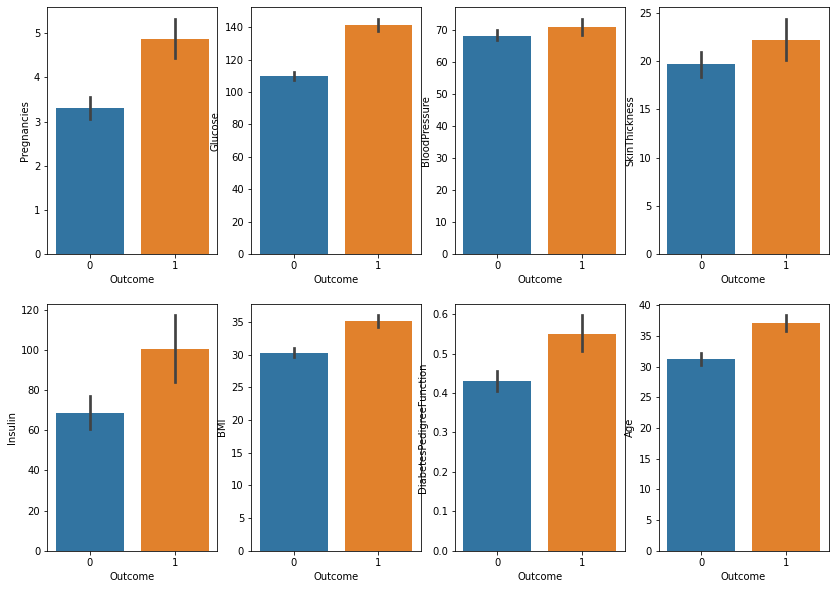

In [479]:
import matplotlib.pyplot as plt

features = df.columns.drop("Outcome")

fig, axs = plt.subplots(2,4, figsize = (14,10))
for i, feature in enumerate(features):
    rows = int(i/4)
    cols = i%4
    
    sns.barplot(x = "Outcome", y = feature, ax = axs[rows][cols], data = df)  

<AxesSubplot:>

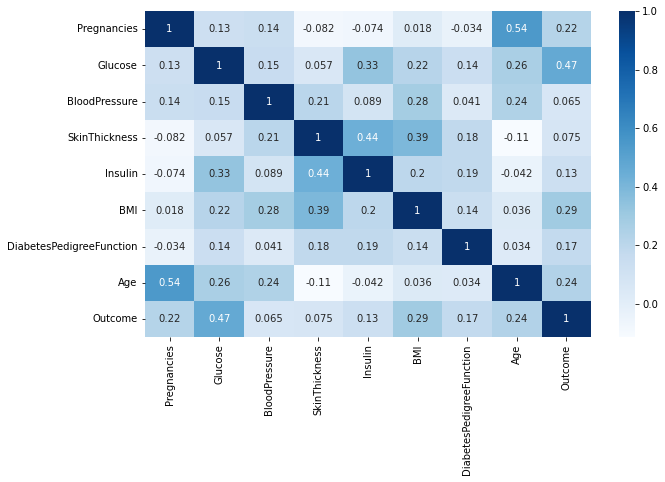

In [480]:
plt.figure(figsize = (10,6))
df_corr = df.corr()
sns.heatmap(df_corr, annot = True, cmap = "Blues")

In [481]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [482]:
# 이상치 식별
df_tmp = df.drop("Outcome",axis = 1)
df_melt = pd.melt(df_tmp, var_name = "col")

In [483]:
df_melt

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0
...,...,...
6139,Age,63.0
6140,Age,27.0
6141,Age,30.0
6142,Age,47.0


<AxesSubplot:xlabel='col', ylabel='value'>

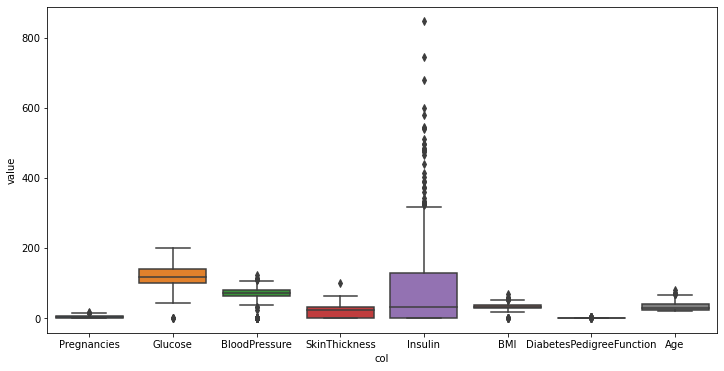

In [484]:
plt.figure(figsize = (12,6))
import seaborn as sns

sns.boxplot(x = "col",y = "value", data = df_melt)

C:\Users\gg787\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

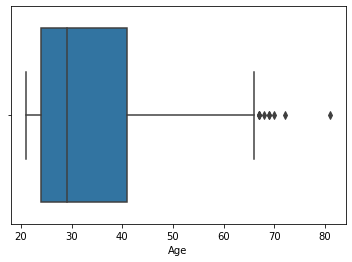

In [485]:
sns.boxplot(df["Age"])

In [486]:
df["Age"].median()

29.0

In [487]:
q1 = np.percentile(df["Age"],25)
q3 = np.percentile(df["Age"],75)

iqr = q3 - q1

cond_1 = q1 - (1.5 * iqr) > df["Age"]
cond_2 = q3 + (1.5 * iqr) < df["Age"]

In [488]:
df[cond_1 | cond_2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [489]:
df = df.drop(df[cond_1 | cond_2].index, axis = 0)

In [490]:
outcome = df["Outcome"]

In [491]:
df = df.drop("Outcome", axis = 1)
df = df.replace(0, df.mean())

In [492]:
df["Outcome"] = outcome

In [493]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,80.666667,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,80.666667,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.71278,80.666667,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,3.831357,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### 업 샘플링 수행

C:\Users\gg787\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

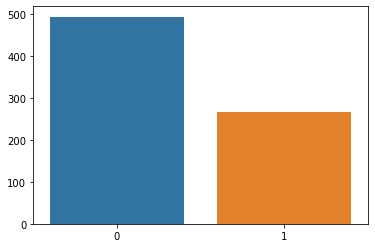

In [494]:
from imblearn.over_sampling import SMOTE

sns.barplot(df["Outcome"].value_counts().index, df["Outcome"].value_counts().values)

In [495]:
feature = df.drop("Outcome", axis = 1)
label = df["Outcome"]

smote = SMOTE()
feature_resamled, label_resampled = smote.fit_resample(feature, label)

In [496]:
label_resampled.value_counts()

1    493
0    493
Name: Outcome, dtype: int64

### 언더 샘플링

In [497]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler()

under_resam_feature, under_resam_label = under.fit_resample(feature, label)

In [498]:
under_resam_label.value_counts()

0    266
1    266
Name: Outcome, dtype: int64

### 모델링

In [499]:
# 업 샘플링 먼저
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_resamled, label_resampled, test_size = 0.3, stratify = label_resampled)

In [500]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [501]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("학습 데이터 성능 : {}".format(lr.score(X_train, y_train)))
print("테스트 데이터 성능 : {}".format(lr.score(X_test, y_test)))

학습 데이터 성능 : 0.736231884057971
테스트 데이터 성능 : 0.7466216216216216


C:\Users\gg787\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [502]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits = 5)
mean_list = []
for train_ind, test_ind in kfold.split(feature):
    X_train, X_test = feature.iloc[train_ind], feature.iloc[test_ind]
    y_train, y_test = label.iloc[train_ind], label.iloc[test_ind]
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    mean_list.append(accuracy)

np.mean(mean_list)

C:\Users\gg787\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gg787\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7734053677239456

In [503]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("rf 학습데이터 정확도 : {}".format(rf.score(X_train, y_train)))
print("rf 테스트 데이터 정확도 : {}".format(rf.score(X_test, y_test)))

rf 학습데이터 정확도 : 1.0
rf 테스트 데이터 정확도 : 0.7615894039735099


In [504]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits = 5)
mean_list = []
for train_ind, test_ind in kfold.split(feature):
    X_train, X_test = feature.iloc[train_ind], feature.iloc[test_ind]
    y_train, y_test = label.iloc[train_ind], label.iloc[test_ind]
    
    rf = LogisticRegression()
    rf.fit(X_train, y_train)
    
    pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    mean_list.append(accuracy)

np.mean(mean_list)

C:\Users\gg787\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gg787\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7734053677239456

In [505]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print("xgb 학습데이터 정확도 : {}".format(xgb.score(X_train, y_train)))
print("xgb 테스트 데이터 정확도 : {}".format(xgb.score(X_test, y_test)))

C:\Users\gg787\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gg787\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:58:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb 학습데이터 정확도 : 1.0
xgb 테스트 데이터 정확도 : 0.7417218543046358


C:\Users\gg787\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [506]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits = 5)
mean_list = []
for train_ind, test_ind in kfold.split(feature):
    X_train, X_test = feature.iloc[train_ind], feature.iloc[test_ind]
    y_train, y_test = label.iloc[train_ind], label.iloc[test_ind]
    
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    
    pred = xgb.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    mean_list.append(accuracy)

np.mean(mean_list)

C:\Users\gg787\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gg787\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:58:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gg787\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gg787\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\gg787\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when 

[17:58:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gg787\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\gg787\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gg787\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[17:58:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gg787\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.7312391077030324

rf 학습데이터 정확도 : 1.0
rf 테스트 데이터 정확도 : 0.8108108108108109


C:\Users\gg787\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gg787\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7734053677239456

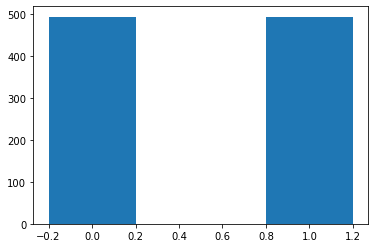

In [507]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

feature = df.drop("Outcome", axis = 1)
label = df["Outcome"]

scaler = StandardScaler()
scaler.fit(feature)
scaler_df = scaler.transform(feature)

smote = SMOTE()

over_X, over_y = smote.fit_resample(scaler_df,label)

plt.bar(over_y.value_counts().index,over_y.value_counts().values, 0.4)

X_train, X_test, y_train, y_test = train_test_split(over_X, over_y, test_size = 0.3, stratify = over_y, random_state = 2021)


rf = RandomForestClassifier(random_state = 2021)
rf.fit(X_train, y_train)

print("rf 학습데이터 정확도 : {}".format(rf.score(X_train, y_train)))
print("rf 테스트 데이터 정확도 : {}".format(rf.score(X_test, y_test)))

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits = 5)
mean_list = []
for train_ind, test_ind in kfold.split(feature):
    X_train, X_test = feature.iloc[train_ind], feature.iloc[test_ind]
    y_train, y_test = label.iloc[train_ind], label.iloc[test_ind]
    
    rf = LogisticRegression()
    rf.fit(X_train, y_train)
    
    pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    mean_list.append(accuracy)

np.mean(mean_list)

In [508]:
# PCA 수행
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(feature)
scaler_df = scaler.transform(feature)
scaler_df

array([[ 0.5399028 ,  0.87010144, -0.01700339, ...,  0.16074771,
         0.46879263,  1.54828125],
       [-1.13330769, -1.20655041, -0.51095625, ..., -0.85832606,
        -0.36177415, -0.16252742],
       [ 1.20918699,  2.02379691, -0.6756072 , ..., -1.33874655,
         0.60421113, -0.07248486],
       ...,
       [ 0.2052607 , -0.01989221, -0.01700339, ..., -0.91655885,
        -0.68075995, -0.25256998],
       [-1.13330769,  0.14492143, -1.0049091 , ..., -0.34878918,
        -0.36779275,  1.27815356],
       [-1.13330769, -0.94284859, -0.18165434, ..., -0.30511459,
        -0.47010895, -0.88286791]])

In [509]:
# feature
pca = PCA(n_components = 8)

pca_data = pca.fit(scaler_df)
ratio = pca.explained_variance_ratio_
ratio.cumsum() 

array([0.28558359, 0.481479  , 0.61896648, 0.73129924, 0.82566091,
       0.8931368 , 0.95202554, 1.        ])

In [510]:
pca = PCA(n_components= 5)
pca = pca.fit(scaler_df)
pca_df = pca.transform(scaler_df)

In [511]:
label.isna().sum()

0

In [512]:
label_2.isna().sum()

9

In [519]:
print(len(label))
print(len(pca_df))

759
759


In [520]:
label_2

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
754    1.0
755    1.0
756    0.0
757    1.0
758    0.0
Name: target, Length: 759, dtype: float64

In [521]:
label

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 759, dtype: int64

In [522]:
label = df["Outcome"]

from sklearn.ensemble import RandomForestClassifier
pca_df = pd.DataFrame(pca_df, columns = ["PCA_1","PCA_2","PCA_3","PCA_4","PCA_5"])
pca_df["target"] = label

feature = pca_df.drop("target", axis = 1)
label_2 = pca_df["target"]

X_train, X_test, y_train, y_test = train_test_split(feature, label)

rf = RandomForestClassifier(n_estimators= 100, random_state = 2021)
rf.fit(X_train, y_train)

print("학습 데이터 성능 : {}".format(rf.score(X_train, y_train)))
print("테스트 데이터 성능 : {}".format(rf.score(X_test, y_test)))



학습 데이터 성능 : 1.0
테스트 데이터 성능 : 0.7421052631578947


In [523]:
pca_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,target
0,1.462697,-0.639992,0.093066,0.573780,-0.453524,1.0
1,-1.587493,0.308426,-0.417857,-0.012948,-0.193101,0.0
2,0.153572,-0.906946,1.859646,0.496725,-0.085481,1.0
3,-2.070213,0.498783,-0.386001,-0.682406,0.060584,0.0
4,1.343127,3.256973,1.529555,4.804605,-0.936357,1.0
...,...,...,...,...,...,...
754,2.328532,-1.643361,-0.820531,-0.242676,-2.320180,1.0
755,-0.438723,0.674883,-0.592022,-0.433715,0.261051,1.0
756,-0.726220,-0.613656,0.315968,-0.523282,-0.039240,0.0
757,-0.772960,-0.383596,0.661472,-0.141340,-0.158090,1.0


In [524]:
label.value_counts()

0    493
1    266
Name: Outcome, dtype: int64

In [518]:
len(pca_df)

759

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold()

for train_ind, test_ind in kfold.split(feature):
    X_train, X_test = 

In [ ]:
label.value_counts()

In [ ]:
df_titainc = pd.read_csv(r"C:\Users\gg787\PerfectGuid수정ver01\1장\titanic\titanic_train.csv")
df_titainc.head()

In [ ]:
new_feature = df_titainc.drop("Survived", axis = 1)

melt_df = pd.melt(df_titainc, id_vars = ["PassengerId","Survived"])

In [ ]:
melt_df